## **Melanoma Classification**

**Problem statement**:

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
# Importing required packages

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [2]:
# Lets load the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [15]:
# Lets check the count of train and test images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2065
118


#### Create a dataset

In [16]:
# Define the parameters required
batch_size = 32
img_height = 180
img_width = 180
num_classes = 9

In [17]:
# Lets load the train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                                data_dir_train,
                                                                seed=123,
                                                                validation_split= 0.2,
                                                                subset= 'training',
                                                                image_size=(img_height,img_width),
                                                                batch_size = batch_size
)

Found 2265 files belonging to 9 classes.
Using 1812 files for training.


In [18]:
# Lets load the test/validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                              data_dir_train,
                                                              seed=123,
                                                              validation_split= 0.2,
                                                              subset= 'validation',
                                                              image_size=(img_height,img_width),
                                                              batch_size = batch_size
)

Found 2265 files belonging to 9 classes.
Using 453 files for validation.


In [19]:
# List out all the classes of skin cancer and store them in a list. 
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

#### Visualize the data

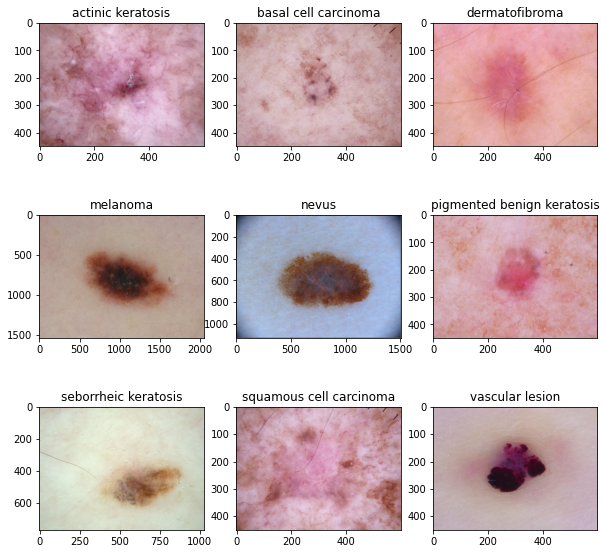

In [20]:
# Lets visualize one instance of all the 9 classes present in the dataset
plt.figure(figsize=(10,10))

for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [21]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### Create the model

In [22]:
# Lets create first basic model with convolutional, pooling, flatten and dense layers

model1 = Sequential([ layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)) ])  # Rescaling the data

model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32))) # Reshaping the data to 180*180*32
model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(num_classes, activation = "softmax"))

In [23]:
#Compile the model using Adam optimizer and SparseCategoricalCrossentropy for loss calculation

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
)

In [24]:
# See the summary of all layers in the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

Train the model

In [25]:
# Lets train the model using 20 epochs
# Calcuating smaples per epoch: data passing = train data/ batch size = 1792/32 = 56

epochs = 20
history = model1.fit(
                    train_ds,
                    validation_data=val_ds,
                    epochs=epochs
)                                             

Epoch 1/20
57/57 [==============================] - 282s 1s/step - loss: 2.0598 - accuracy: 0.2290 - val_loss: 1.8973 - val_accuracy: 0.2781
Epoch 2/20
57/57 [==============================] - 4s 77ms/step - loss: 1.8912 - accuracy: 0.2837 - val_loss: 1.9664 - val_accuracy: 0.2649
Epoch 3/20
57/57 [==============================] - 4s 76ms/step - loss: 1.8522 - accuracy: 0.3030 - val_loss: 1.7978 - val_accuracy: 0.3157
Epoch 4/20
57/57 [==============================] - 4s 76ms/step - loss: 1.7500 - accuracy: 0.3471 - val_loss: 1.7071 - val_accuracy: 0.3731
Epoch 5/20
57/57 [==============================] - 4s 77ms/step - loss: 1.7066 - accuracy: 0.3620 - val_loss: 1.6751 - val_accuracy: 0.4084
Epoch 6/20
57/57 [==============================] - 4s 76ms/step - loss: 1.6541 - accuracy: 0.3825 - val_loss: 1.6557 - val_accuracy: 0.3996
Epoch 7/20
57/57 [==============================] - 4s 77ms/step - loss: 1.6669 - accuracy: 0.3813 - val_loss: 1.6267 - val_accuracy: 0.4062
Epoch 8/20
57

Visualizing training results

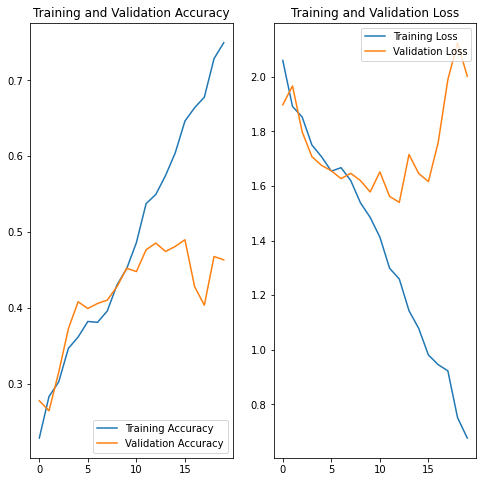

In [26]:
# Getting accuracy of train and validation from the built model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Getting loss of train and validation from the built model
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs_range = range(epochs)

# Plot of accuracy vs train and validation
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot of loss vs train and validation
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings from Model1**

- As we can observe from above model building results and plots for the same. The model giving 74% on train data and 46% on test data. By this we conclude **model is overfitting**.
- To overcome overfitting lets train model on some more variety of data by doing data augmentation.

#### Data Augmentation

In [27]:
# Lets create some layers to get augmented data by doing Flipping, Rotating and Zooming the available images
data_augument = keras.Sequential([
                                  layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                                  layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                                  layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

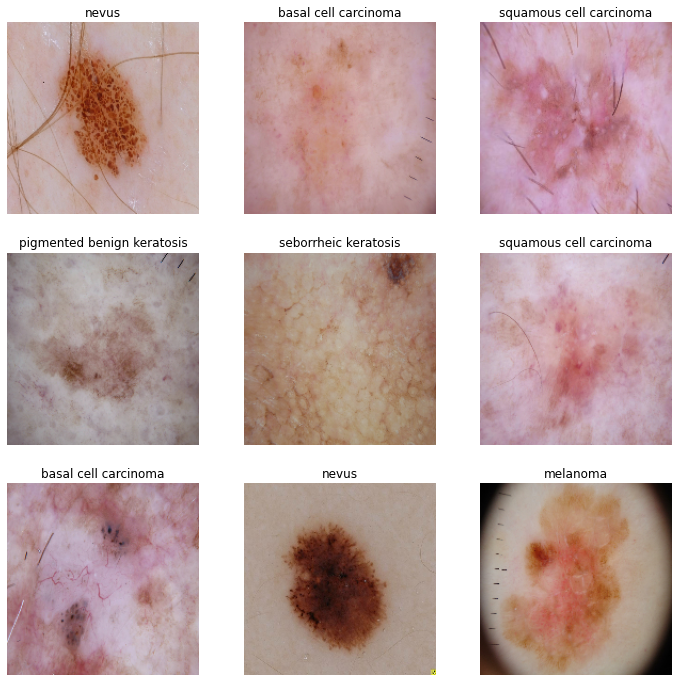

In [28]:
# Lets visualize how augmentation strategy works for one instance of training image

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

#### Create the model, compile and train the model using Augmentation

In [29]:
# Lets build our 2nd model by adding dropout of 0.25 to our basic model to overcome overfitting

model2 = Sequential([ data_augument, layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)) ])

model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(num_classes, activation = "softmax"))

In [30]:
# Lets compile the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [31]:
# Lets train our model for 20 epochs
epochs=20
history = model2.fit(
                      train_ds,
                      validation_data=val_ds,
                      epochs=epochs
)

Epoch 1/20
57/57 [==============================] - 7s 97ms/step - loss: 2.1075 - accuracy: 0.1694 - val_loss: 2.0560 - val_accuracy: 0.1876
Epoch 2/20
57/57 [==============================] - 5s 88ms/step - loss: 2.0140 - accuracy: 0.2169 - val_loss: 1.8690 - val_accuracy: 0.2936
Epoch 3/20
57/57 [==============================] - 5s 88ms/step - loss: 1.8683 - accuracy: 0.3057 - val_loss: 1.8706 - val_accuracy: 0.3024
Epoch 4/20
57/57 [==============================] - 5s 90ms/step - loss: 1.8257 - accuracy: 0.3262 - val_loss: 1.6987 - val_accuracy: 0.3355
Epoch 5/20
57/57 [==============================] - 5s 88ms/step - loss: 1.8009 - accuracy: 0.3234 - val_loss: 1.7040 - val_accuracy: 0.3841
Epoch 6/20
57/57 [==============================] - 5s 88ms/step - loss: 1.6802 - accuracy: 0.3780 - val_loss: 1.6226 - val_accuracy: 0.4194
Epoch 7/20
57/57 [==============================] - 5s 88ms/step - loss: 1.6558 - accuracy: 0.3996 - val_loss: 1.6906 - val_accuracy: 0.4084
Epoch 8/20
57

Visualize the results

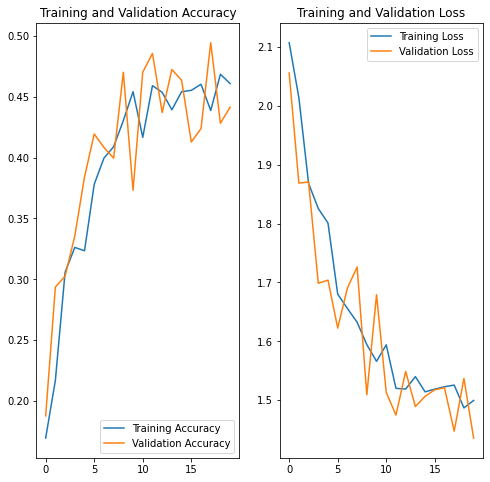

In [32]:
# Getting accuracy of train and validation from the built model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Getting loss of train and validation from the built model
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs_range = range(epochs)

# Plot of accuracy vs train and validation
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot of loss vs train and validation
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings from Model2**

- As we can observe from above model building results and plots for the same. The model giving 46% on train data and 44% on test data. By this we conclude that we overcame model overfitting.
- As we have class imbalance in the dataset, lets handle class imbalance using **Augmentor** library.

In [33]:
# Lets create dataframe of path and label of each class images
path_list   = []
lesion_list = []

for i in class_names:      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)

dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
1,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
2,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
3,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
4,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
...,...,...
2060,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
2061,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
2062,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
2063,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion


<BarContainer object of 9 artists>

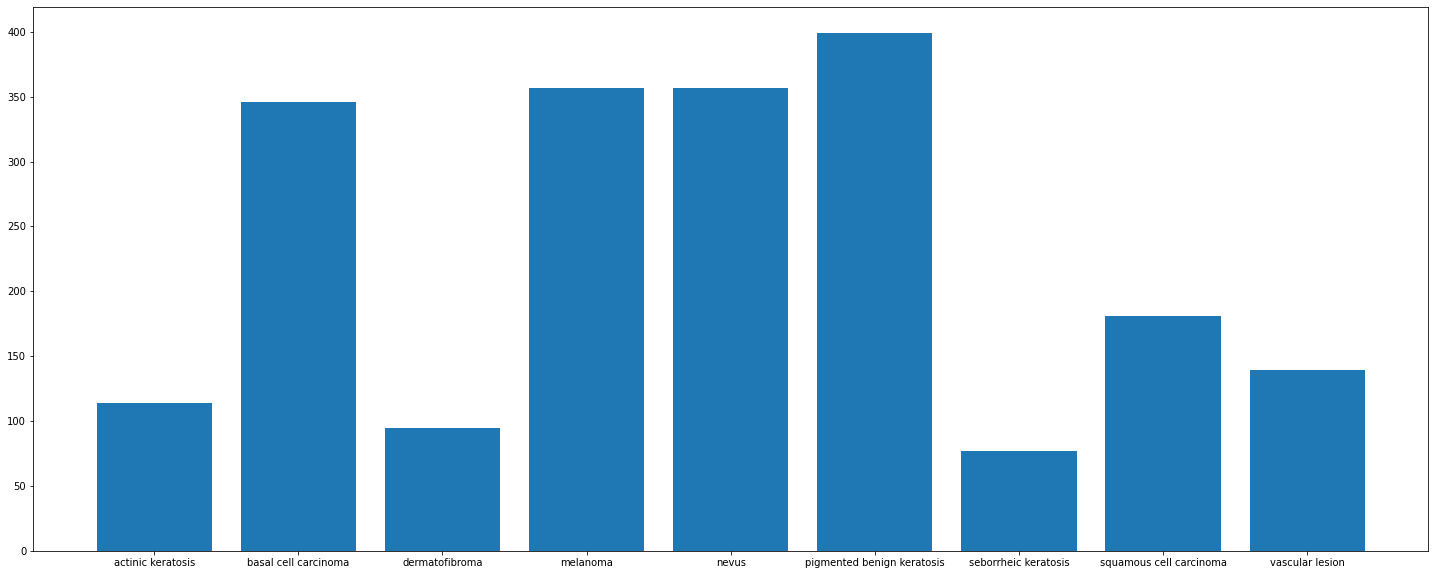

In [35]:
# Visualize the distribution of all the classes
count = []

for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

In [36]:
# Lets look at all the classes in the dataset
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

**Findings from class distibution**

- **actinic keratosis, dermatofibroma, seborrheic keratosis, squamous cell carcinoma and vascular lesion** has least number of samples
- **basal cell carcinoma, melanoma, nevus, pigmented benign keratosis** have more number of classes.
- By looking above points, we can conclude there is clear imbalance in the given dataset.

#### Handling class imbalance

In [37]:
# Lets install Augmentor library
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
# Lets add 500 more samples to all the classes in the dataset
import Augmentor
path_to_training_dataset="/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F18581D1290>: 100%|██████████| 500/500 [00:18<00:00, 26.39 Samples/s]


Initialised with 346 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F18E02471D0>: 100%|██████████| 500/500 [00:18<00:00, 27.60 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1859C28710>: 100%|██████████| 500/500 [00:22<00:00, 22.60 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F185A1EBC50>: 100%|██████████| 500/500 [01:38<00:00,  5.07 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F1859C1F650>: 100%|██████████| 500/500 [01:29<00:00,  5.57 Samples/s]


Initialised with 439 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F185A1EBC50>: 100%|██████████| 500/500 [00:18<00:00, 27.71 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F185A09DF50>: 100%|██████████| 500/500 [00:41<00:00, 11.96 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1859C48690>: 100%|██████████| 500/500 [00:19<00:00, 25.31 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F1858245C10>: 100%|██████████| 500/500 [00:18<00:00, 27.23 Samples/s]


In [41]:
# The number of samples added in total to the original dataset
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4820


## Lets see the distribution of augmented data after adding new images to the original training data.


In [42]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029659.jpg_8c7042e7-708e-491b-a52e-240026552794.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025803.jpg_55e61679-cbf1-47cf-a1af-f479eea58730.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028854.jpg_ed8505d6-b068-4e31-8426-a59ac3259112.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030825.jpg_557c284f-7281-493d-b9e1-4b98b4513831.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic kera

In [43]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [44]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [45]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [46]:
# Distribution of data in each class
new_df['Label'].value_counts()

basal cell carcinoma          996
pigmented benign keratosis    969
melanoma                      857
nevus                         857
squamous cell carcinoma       781
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

#### Train the model on the balance data created using Augmentor

In [47]:
# Lets create train dataset post handling class imbalance
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                                data_dir_train,
                                                                seed=123,
                                                                validation_split = 0.2,
                                                                subset = "training",
                                                                image_size=(img_height, img_width),
                                                                batch_size=batch_size
)

Found 6925 files belonging to 9 classes.
Using 5540 files for training.


In [48]:
# Lets create test dataset post handling class imbalance
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                                              data_dir_train,
                                                              seed=123,
                                                              validation_split = 0.2,
                                                              subset = 'validation',
                                                              image_size=(img_height, img_width),
                                                              batch_size=batch_size
)

Found 6925 files belonging to 9 classes.
Using 1385 files for validation.


#### Model building, training and compiling

In [58]:
# Lets create 3rd model using balanced dataset and using dropouts

model3 = Sequential([ layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)) ])

model3.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model3.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.4))
model3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.4))

model3.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.4))
model3.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.4))

model3.add(Flatten())
model3.add(Dense(num_classes, activation = "softmax"))

In [59]:
# Lets compile the model
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [60]:
# Lets train the model
epochs = 30

history = model3.fit(
                      train_ds,
                      validation_data=val_ds,
                      epochs=epochs
)

Epoch 1/30
174/174 [==============================] - 37s 203ms/step - loss: 2.5055 - accuracy: 0.3168 - val_loss: 3.0351 - val_accuracy: 0.1581
Epoch 2/30
174/174 [==============================] - 35s 194ms/step - loss: 2.0226 - accuracy: 0.3953 - val_loss: 1.9449 - val_accuracy: 0.3047
Epoch 3/30
174/174 [==============================] - 35s 193ms/step - loss: 1.7522 - accuracy: 0.4487 - val_loss: 1.7739 - val_accuracy: 0.4448
Epoch 4/30
174/174 [==============================] - 36s 201ms/step - loss: 1.6307 - accuracy: 0.4771 - val_loss: 2.6281 - val_accuracy: 0.3718
Epoch 5/30
174/174 [==============================] - 35s 194ms/step - loss: 1.4512 - accuracy: 0.5274 - val_loss: 4.4285 - val_accuracy: 0.2072
Epoch 6/30
174/174 [==============================] - 35s 195ms/step - loss: 1.3534 - accuracy: 0.5563 - val_loss: 3.7953 - val_accuracy: 0.2549
Epoch 7/30
174/174 [==============================] - 35s 195ms/step - loss: 1.2599 - accuracy: 0.5847 - val_loss: 1.7061 - val_ac

Visualize the model results via graphs

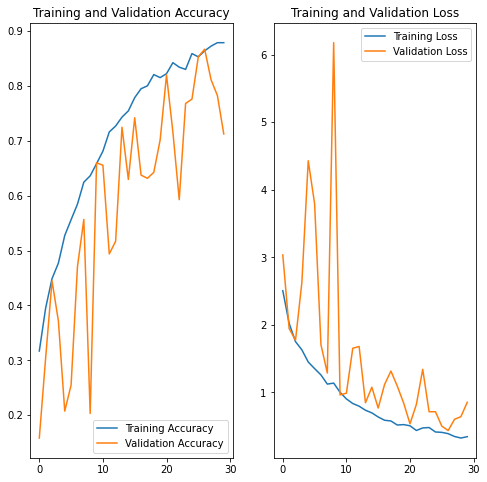

In [61]:
# Getting accuracy of train and validation from the built model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Getting loss of train and validation from the built model
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs_range = range(epochs)

# Plot of accuracy vs train and validation
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot of loss vs train and validation
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Conclusion

- The accuracy of the model increased by handling class imbalance.
- As we can see with 30 epochs, 87% accuracy on train and 71% accuracy on test. There is still overfitting happening with difference of 16.
- This can overcome by using more layers and epochs. Also by tuning learning rate and dropout percentage. 